In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
     

In [60]:
train_data=pd.read_csv("C:/Users/Geo/Downloads/New folder (27)/fraudTest.csv")
test_data=pd.read_csv("C:/Users/Geo/Downloads/New folder (27)/fraudTrain.csv")
     

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [6]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
print(train_data['is_fraud'].value_counts())

0    553574
1      2145
Name: is_fraud, dtype: int64


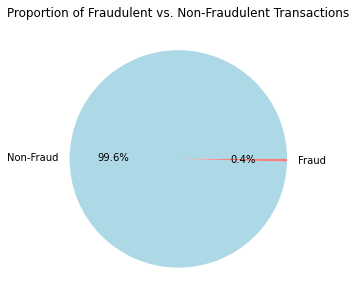

In [8]:
plt.figure(figsize=(5, 5))
train_data['is_fraud'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], labels=['Non-Fraud', 'Fraud'])
plt.title('Proportion of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('')
plt.show()


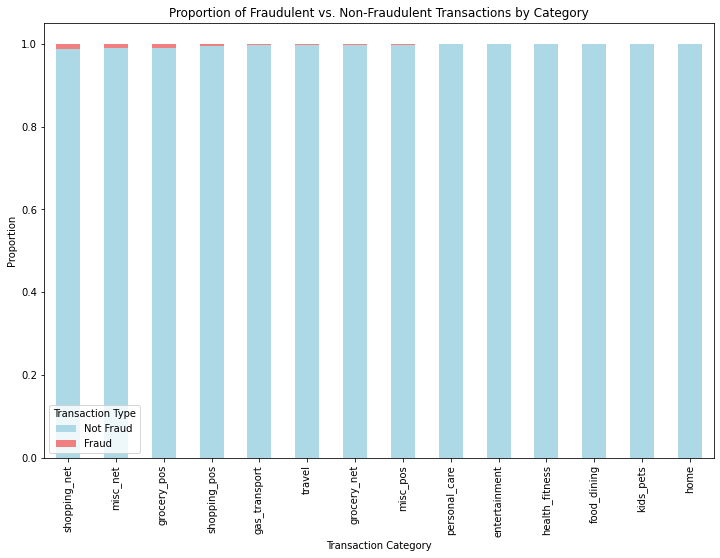

In [9]:
category_fraud_counts = train_data.groupby('category')['is_fraud'].value_counts(normalize=True).unstack().fillna(0)
category_fraud_counts.columns = ['Not Fraud', 'Fraud']
category_fraud_counts = category_fraud_counts.sort_values(by='Fraud', ascending=False)

category_fraud_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=['lightblue', 'lightcoral'])
plt.xlabel('Transaction Category')
plt.ylabel('Proportion')
plt.title('Proportion of Fraudulent vs. Non-Fraudulent Transactions by Category')
plt.legend(title='Transaction Type')
plt.show()


In [61]:
train_data["trans_date_trans_time"]=pd.to_datetime(train_data["trans_date_trans_time"])
train_data["dob"]=pd.to_datetime(train_data["dob"])
train_data

test_data["trans_date_trans_time"]=pd.to_datetime(test_data["trans_date_trans_time"])
test_data["dob"]=pd.to_datetime(test_data["dob"])
test_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [12]:
corr = train_data.corr()
corr

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,-0.000823,-0.001137,0.001479,0.000336,-0.001558,-0.000794,0.997054,0.000394,-0.001586,-0.013892
cc_num,-0.000823,1.000000,0.001963,0.041610,-0.057512,-0.048783,-0.009414,-0.000810,-0.057183,-0.048818,-0.001540
amt,-0.001137,0.001963,1.000000,0.002310,0.002339,-0.002046,0.002760,-0.000974,0.002404,-0.002053,0.182267
zip,0.001479,0.041610,0.002310,1.000000,-0.115173,-0.909942,0.075571,0.001395,-0.114809,-0.909117,-0.002271
lat,0.000336,-0.057512,0.002339,-0.115173,1.000000,-0.012892,-0.152666,0.000301,0.993557,-0.012831,0.005863
long,-0.001558,-0.048783,-0.002046,-0.909942,-0.012892,1.000000,-0.051524,-0.001460,-0.012551,0.999115,-0.000972
city_pop,-0.000794,-0.009414,0.002760,0.075571,-0.152666,-0.051524,1.000000,-0.000740,-0.151703,-0.051489,-0.004910
unix_time,0.997054,-0.000810,-0.000974,0.001395,0.000301,-0.001460,-0.000740,1.000000,0.000365,-0.001485,-0.013066
merch_lat,0.000394,-0.057183,0.002404,-0.114809,0.993557,-0.012551,-0.151703,0.000365,1.000000,-0.012496,0.005812
merch_long,-0.001586,-0.048818,-0.002053,-0.909117,-0.012831,0.999115,-0.051489,-0.001485,-0.012496,1.000000,-0.001060


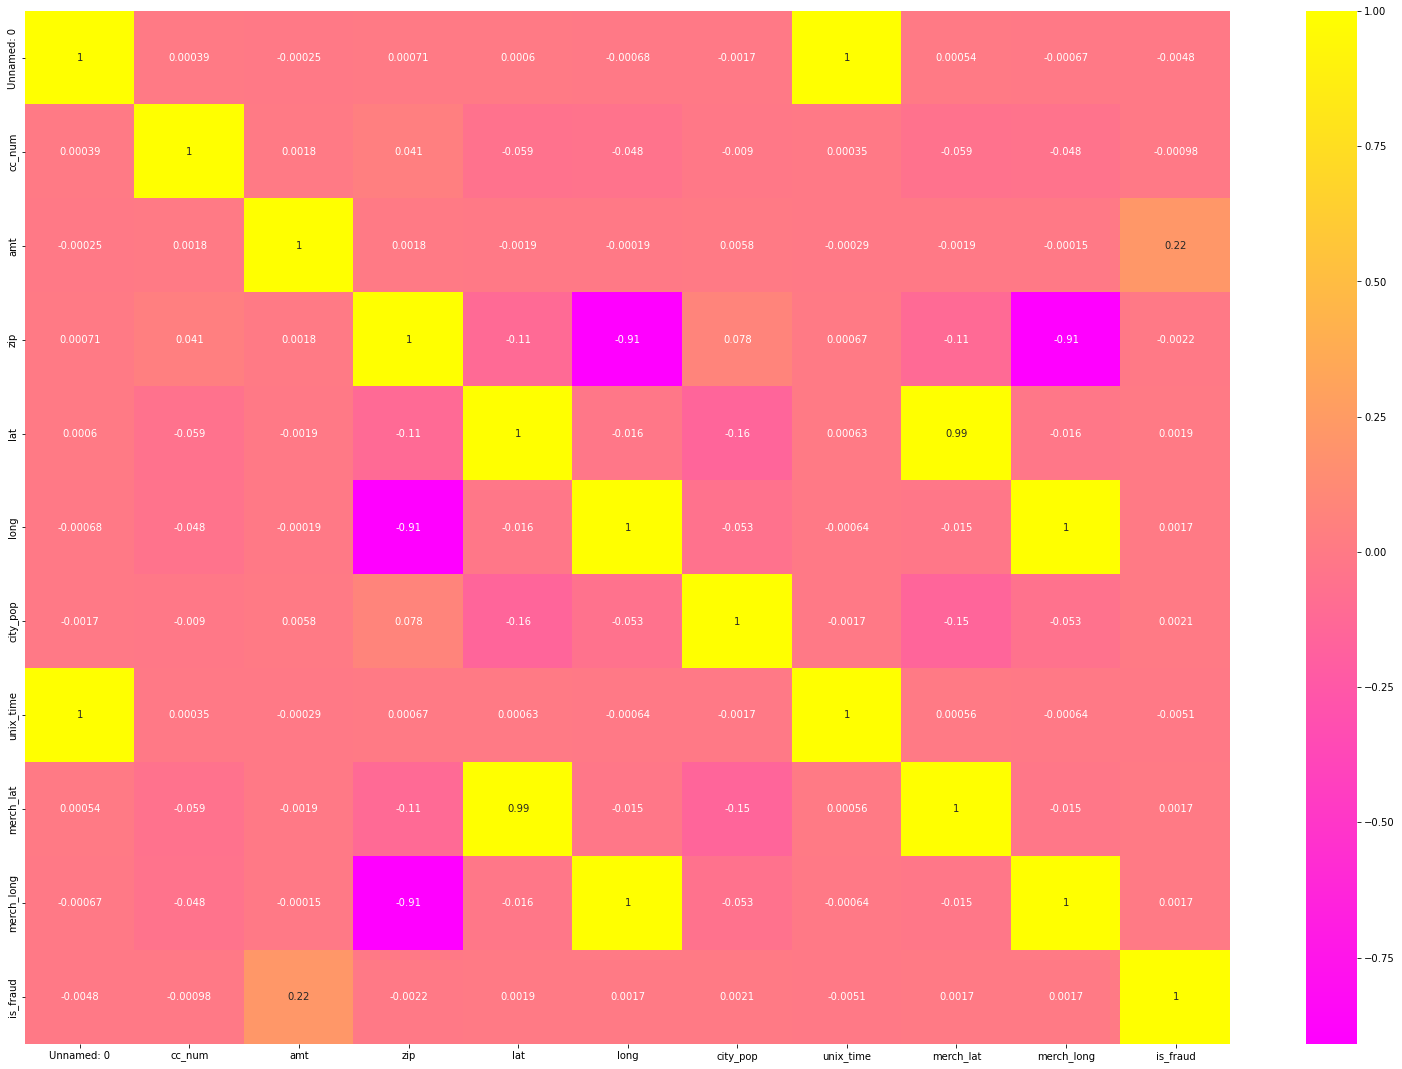

In [14]:
plt.figure(figsize=(27,19))
sns.heatmap(corr, cmap = 'spring', annot= True )
plt.show()

In [62]:
drop_columns = ['Unnamed: 0','cc_num','trans_num','unix_time',
               'first','last','street','zip','trans_date_trans_time','city',
               'lat','long','dob','merch_lat','merch_long','state']
train_data.drop(columns=drop_columns,inplace=True)
test_data.drop(columns=drop_columns,inplace=True)

print(train_data)
train_data.shape

print(test_data.head(5))
test_data.shape

                                    merchant        category     amt gender  \
0                      fraud_Kirlin and Sons   personal_care    2.86      M   
1                       fraud_Sporer-Keebler   personal_care   29.84      F   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28      F   
3                          fraud_Haley Group        misc_pos   60.05      M   
4                      fraud_Johnston-Casper          travel    3.19      M   
...                                      ...             ...     ...    ...   
555714                 fraud_Reilly and Sons  health_fitness   43.77      M   
555715                  fraud_Hoppe-Parisian       kids_pets  111.84      M   
555716                       fraud_Rau-Robel       kids_pets   86.88      F   
555717                 fraud_Breitenberg LLC          travel    7.99      M   
555718                     fraud_Dare-Marvin   entertainment   38.13      M   

        city_pop                     job  is_fraud 

(1296675, 7)

In [69]:
x_train = train_data.drop('is_fraud',axis=1)
y_train = train_data['is_fraud']

x_test=test_data.drop('is_fraud',axis=1)
y_test = test_data['is_fraud']
     

In [68]:
encoder = LabelEncoder()
train_data["gender"]=encoder.fit_transform(train_data["gender"])
test_data["gender"]=encoder.fit_transform(test_data["gender"])

train_data["category"]=encoder.fit_transform(train_data["category"])
test_data["category"]=encoder.fit_transform(test_data["category"])

train_data["job"]=encoder.fit_transform(train_data["job"])
test_data["job"]=encoder.fit_transform(test_data["job"])

train_data["merchant"]=encoder.fit_transform(train_data["merchant"])
test_data["merchant"]=encoder.fit_transform(test_data["merchant"])
# Assuming your DataFrame is named df
train_data['amt'] = train_data['amt'].astype(int)
# Fill missing values
train_data.fillna(-999, inplace=True)
test_data.fillna(-999, inplace=True)
test_data.fillna(-999,inplace=True)
test_data.fillna(-999,inplace=True)

# Drop rows containing -999 in train_data
train_data = train_data[train_data != -999].dropna()

# Drop rows containing -999 in test_data
test_data = test_data[test_data != -999].dropna()


In [65]:
train_data.head()

,merchant,category,amt,gender,city_pop,job,is_fraud
0,319,10,2,1,333497,275,0
1,591,10,29,0,302,392,0
2,611,5,41,0,34496,259,0
3,222,9,60,1,54767,407,0
4,292,13,3,1,1126,196,0


In [66]:
train_data.head()
test_data.head()

,merchant,category,amt,gender,city_pop,job,is_fraud
0,514,8,4.97,0,3495,370,0
1,241,4,107.23,0,149,428,0
2,390,0,220.11,1,4154,307,0
3,360,2,45.00,1,1939,328,0
4,297,9,41.96,1,99,116,0


In [73]:
train_data["is_fraud"].dtype

dtype('int64')

In [55]:
print(x_train.dtypes)
print(y_train.dtypes)

merchant    int32
category    int32
amt         int32
gender      int32
city_pop    int64
job         int32
dtype: object
int64


In [56]:
from sklearn.ensemble import RandomForestClassifier

cla=RandomForestClassifier(n_estimators=100,random_state=42)
cla.fit(x_train,y_train)

y_pred=cla.predict(x_test)

report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)
print("Classification Report : ",report)

Accuracy:  0.9965951375633832
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       0.86      0.50      0.63      7506

    accuracy                           1.00   1296675
   macro avg       0.93      0.75      0.81   1296675
weighted avg       1.00      1.00      1.00   1296675



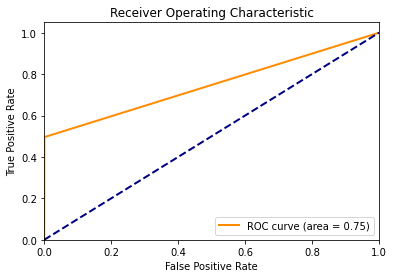

AUC: 0.7476902540491606


In [57]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)
